# Basic Time Series Metrics & Resampling

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt

## Compare Time Series Growth Rates

### Compare the performance of several asset classes
You have seen how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let’s compare four key assets: stocks, bonds, gold, and oil.

In [2]:
# Import data here
prices = pd.read_csv('Data/stock_data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
 
# Inspect prices here
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


In [3]:
# Select first prices
first_prices = prices.iloc[0]
 
# Create normalized
normalized = prices.div(first_prices).mul(100)
normalized.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372


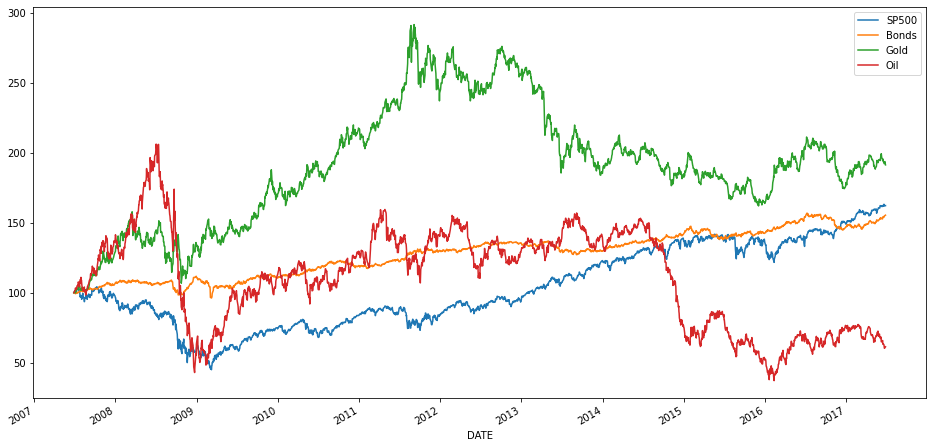

In [4]:
# Plot normalized
normalized.plot(figsize=(16,8))
plt.show()

### Comparing stock prices with a benchmark
You also learned in the video how to compare the performance of various stocks against a benchmark. Now you’ll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

In [5]:
# Import stock prices and index here
stocks = pd.read_csv('Data/stock_data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('Data/stock_data/dow_jones.csv', parse_dates=['date'], index_col='date')

In [6]:
# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


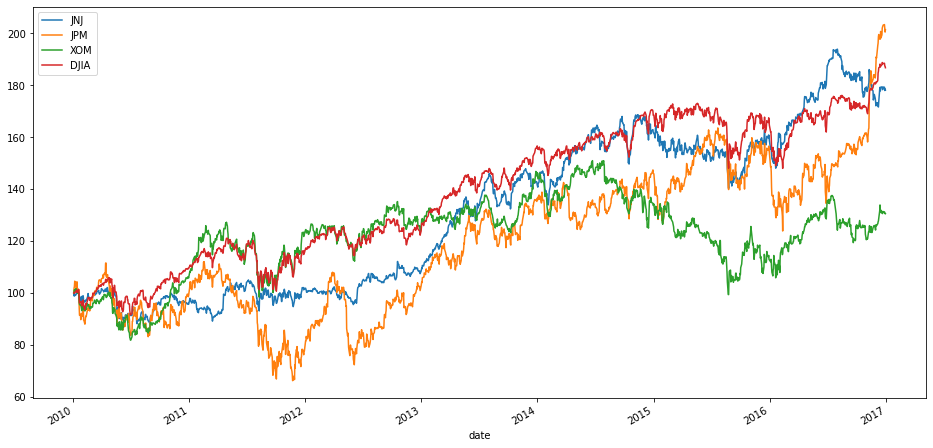

In [7]:
# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot(figsize=(16,8))
plt.show()

### Plot performance difference vs benchmark index
You learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let’s compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

In [8]:
# Create tickers
tickers = ['MSFT', 'AAPL']
 
# Import stock data here
stocks = pd.read_csv('Data/stock_data/msft_aapl.csv', parse_dates=['date'], index_col='date')
 
# Import index here
sp500 = pd.read_csv('Data/stock_data/sp500.csv', parse_dates=['date'], index_col='date')

In [9]:
# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()
 
# Normalize data
normalized = data.div(data.iloc[0]).mul(100)
normalized.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976


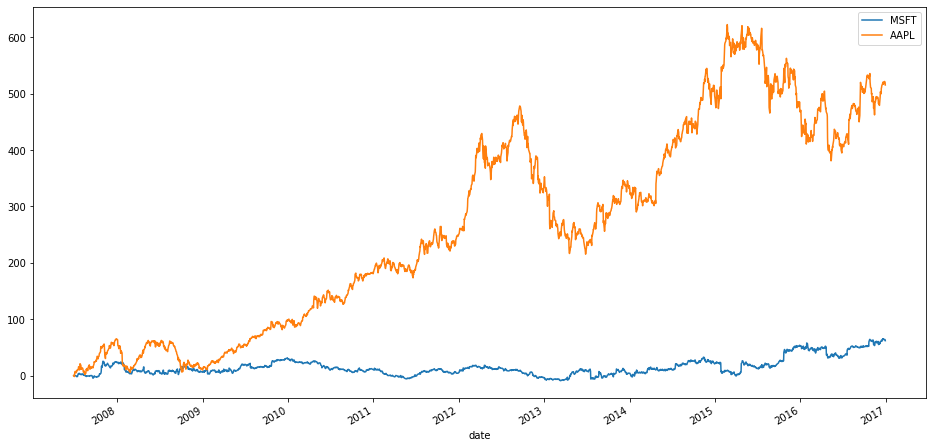

In [10]:
# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot(figsize=(16,8))
plt.show()

## Changing the Time Series Frequency: Resampling

### Convert monthly to weekly data
You have learned how to use .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.

Let’s practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [11]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

In [12]:
# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')
 
# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


In [13]:
# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64


In [14]:
print(monthly.reindex(weekly_dates, method='bfill'))

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [15]:
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


### Create weekly from monthly unemployment data
The civilian US unemployment rate is reported monthly. You may need more frequent data, but that’s no problem because you just learned how to upsample a time series.

You’ll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

In [16]:
# Import data here
data = pd.read_csv('Data/stock_data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
data = data.drop(columns=['Debt/GDP'])

In [17]:
# Show first five rows of weekly series
print(data.asfreq('W').head())
 
# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())
 
# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

            Unemployment
date                    
2010-01-03           NaN
2010-01-10           NaN
2010-01-17           NaN
2010-01-24           NaN
2010-01-31           NaN
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8


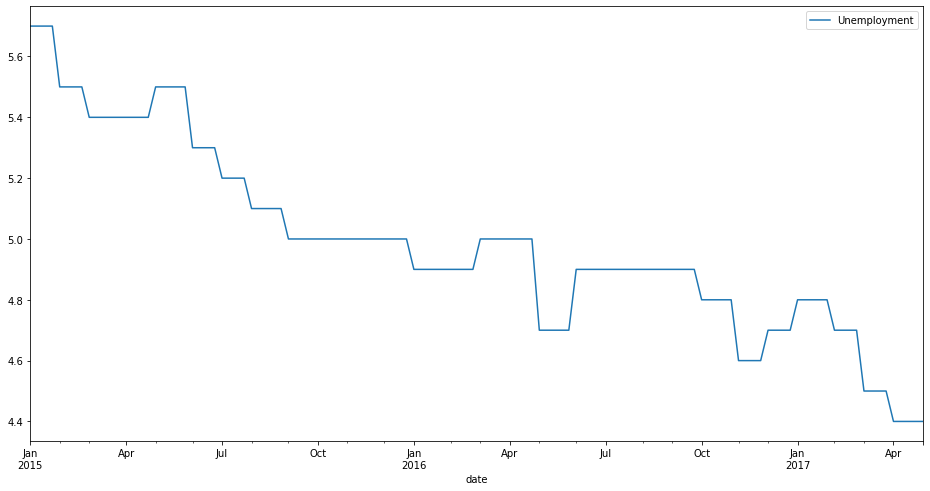

In [18]:
# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot(figsize=(16,8))
plt.show()

## Upsampling & Interpolation with `.resample()`

### Use interpolation to create weekly employment data
You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new ```.interpolate()``` method.

In [19]:
# Inspect data here
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unemployment  89 non-null     float64
dtypes: float64(1)
memory usage: 3.9 KB
None


In [20]:
# Create weekly dates
weekly_dates = pd.date_range(data.index.min(), data.index.max(), freq='W')
 
# Reindex monthly to weekly data
weekly = data.reindex(weekly_dates)
 
# Create ffill and interpolated columns
weekly['ffill'] = weekly.Unemployment.ffill()
weekly['interpolated'] = weekly.Unemployment.interpolate()

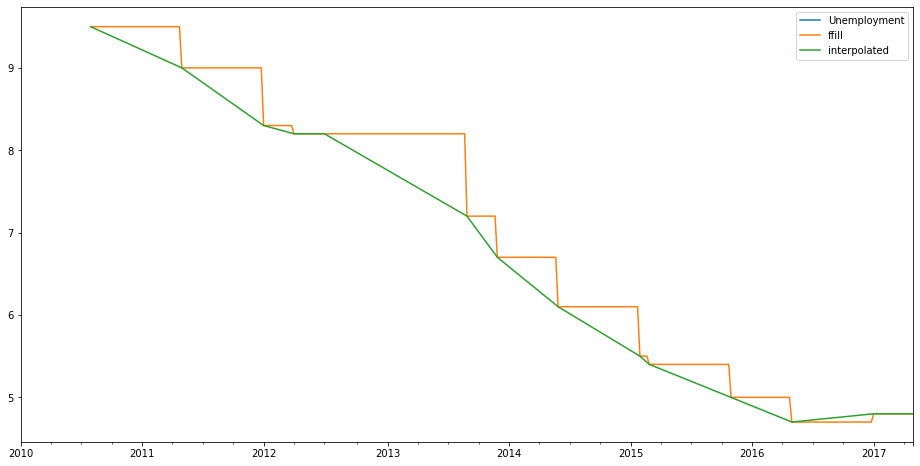

In [21]:
# Plot weekly
weekly.plot(figsize=(16,8))
plt.show()

### Interpolate debt/GDP and compare to unemployment
Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

In [22]:
# Import & inspect data here
data = pd.read_csv('Data/stock_data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


In [23]:
# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


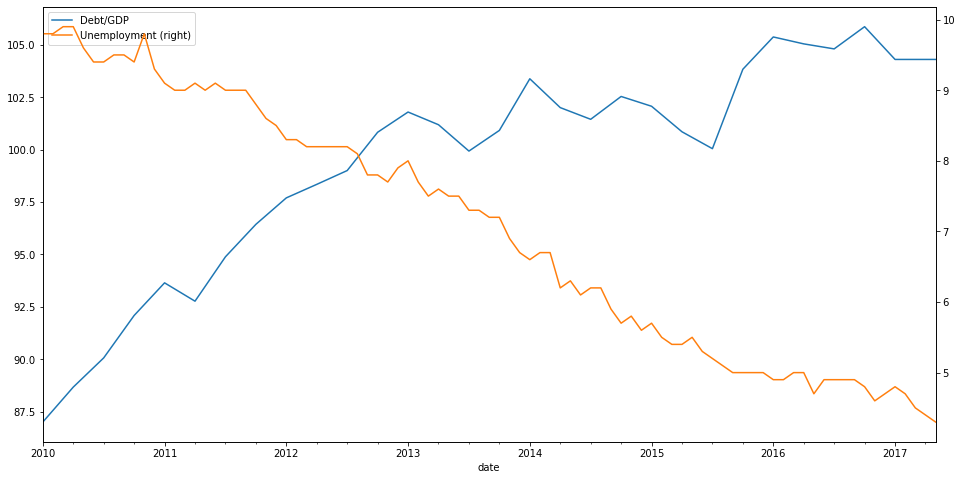

In [24]:
# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment',figsize=(16,8))
plt.show()

## Downsampling & Aggregation

### Compare weekly, monthly and annual ozone trends for NYC & LA
You’ll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

In [25]:
# Import and inspect data here
ozone = pd.read_csv('Data/air_quality/ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


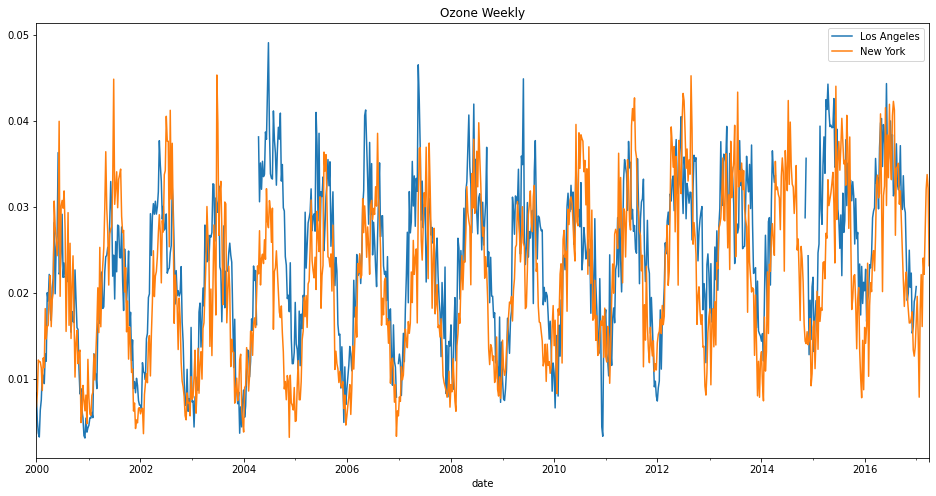

In [26]:
# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot(figsize=(16,8))
plt.title('Ozone Weekly')
plt.show()

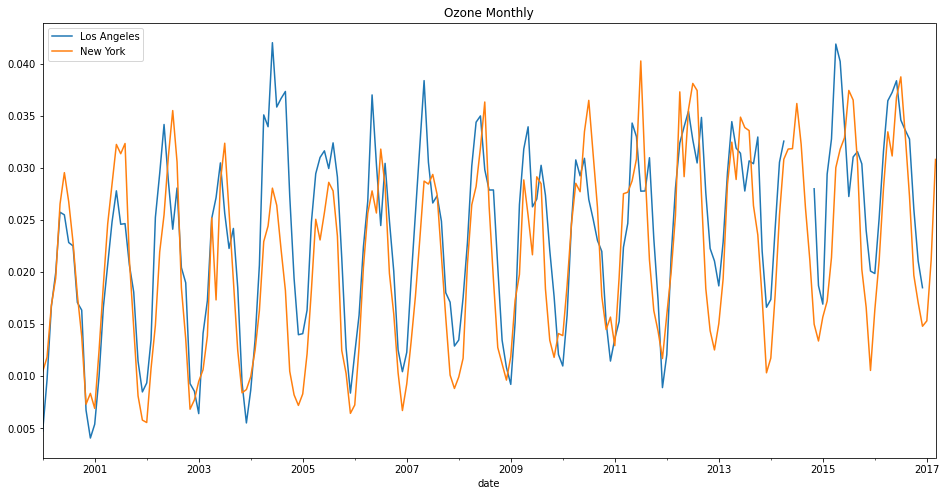

In [27]:
# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot(figsize=(16,8))
plt.title('Ozone Monthly')
plt.show()

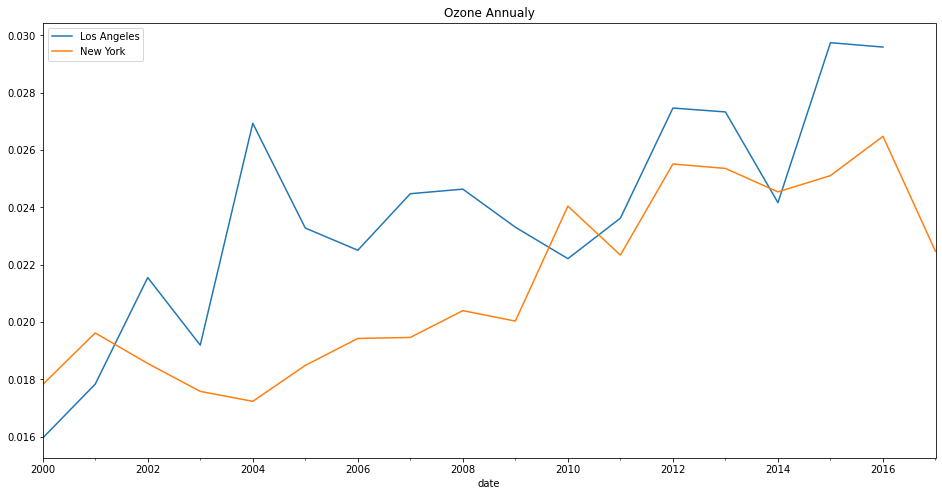

In [28]:
# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot(figsize=(16,8))
plt.title('Ozone Annualy')
plt.show()

### Compare monthly average stock prices for Facebook and Google

In [29]:
# Import and inspect data here
stocks = pd.read_csv('Data/stock_data/goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


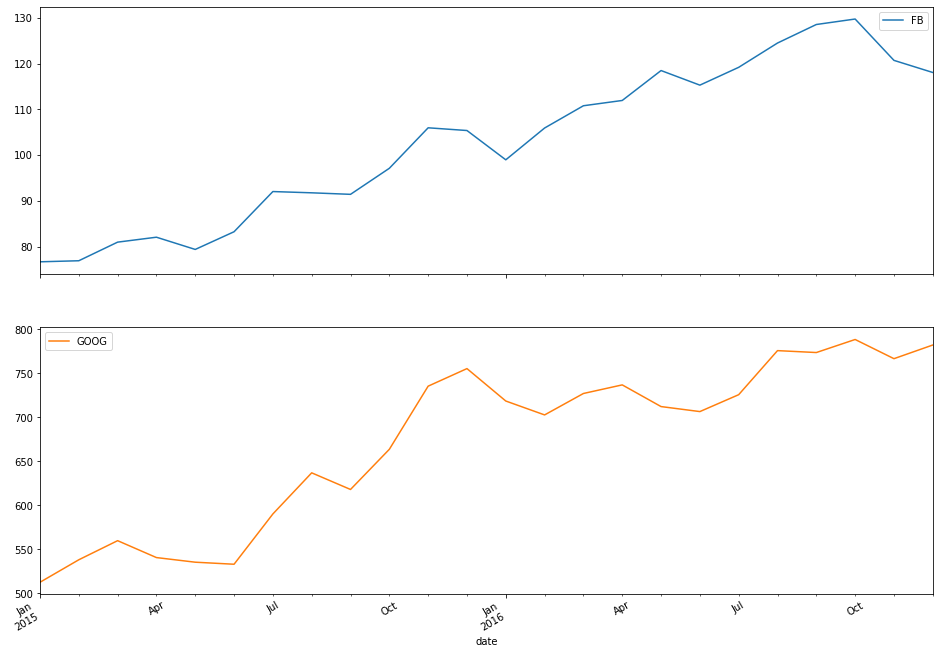

In [30]:
# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True,figsize=(16,12))
plt.show()

### Compare quarterly GDP growth rate and stock returns
With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let’s compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you’ll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.

In [31]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('Data/stock_data/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None


In [32]:
# Import and inspect djia here
djia = pd.read_csv('Data/stock_data/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


In [33]:
# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate and rename
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

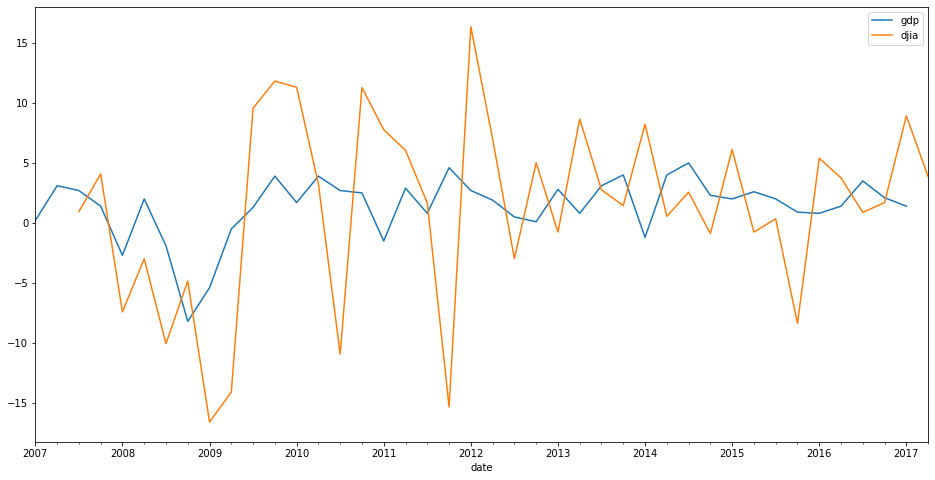

In [34]:
# Plot djia_quarterly_return and gdp_growth here 
data.plot(figsize=(16,8))
plt.show()

### Visualize monthly mean, median and standard deviation of S&P500 returns
You have also learned how to calculate several aggregate statistics from upsampled data.

Let’s use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

In [35]:
# Import data here
sp500 = pd.read_csv('Data/stock_data/sp500.csv', parse_dates=['date'], index_col='date')

In [36]:
# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()
 
# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

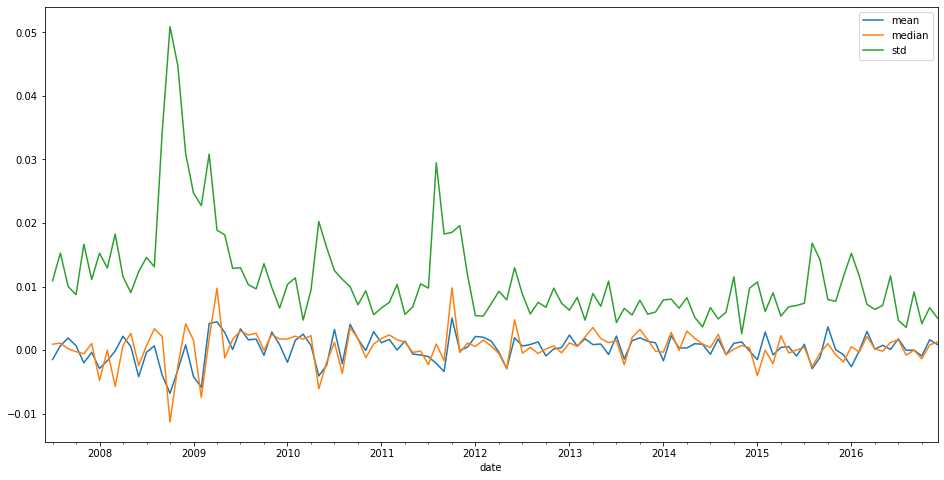

In [37]:
# Plot stats here
stats.plot(figsize=(16,8))
plt.show()